(assignment-3)=
# Home assignment 3

In [1]:
!echo Last updated: `date +"%Y-%m-%d %H:%M:%S"`

Last updated: 2022-05-11 11:29:46


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 35
plt.rcParams["figure.figsize"] = (6, 6)

*****

## Question 1

> * Read the `world_cities.csv` file into a `DataFrame` object.
> * Calculate and print a new table, where each row represents a *country*, with the following columns:
>     * `"country"`—Country name
>     * `"capital"`—The name of the capital city
>     * `"pop_total"`—The total population (population in all cities summed)
> * Note that for some countries there is more than one value marked as the capital! The resulting table still needs to have one row per country: capital name (`"capital"`) should be the *first* if there is more than one, while total population (`"pop_total"`) needs to be the sum of all cities (regardless of duplicates).

In [1]:
import pandas as pd

dat = pd.read_csv("data/world_cities.csv")
capitals = dat[dat["capital"] == 1][["country", "city"]].groupby("country").first().reset_index()
capitals = capitals.rename(columns = {"city": "capital"})
populations = dat[["country", "pop"]].groupby("country").sum().reset_index()
populations = populations.rename(columns = {"pop": "pop_total"})
result = pd.merge(capitals, populations, on = "country")
result

country           capital  pop_total
0          Afghanistan             Kabul    7543856
1              Albania            Tirana    1536232
2              Algeria           Algiers   20508642
3       American Samoa         Pago Pago      58021
4              Andorra  Andorra la Vella      69031
..                 ...               ...        ...
223  Wallis and Futuna          Mata'utu      11380
224     Western Sahara          al-'Ayun     338786
225              Yemen             San'a    5492077
226             Zambia            Lusaka    4032170
227           Zimbabwe            Harare    4231859

[228 rows x 3 columns]

## Question 2

> * The text file named `bgu.wkt` (see {ref}`sample-data`) contains a WKT string representing the geometry of the BGU logo. 
> * Read the WKT string from the `bgu.wkt` file, using the `open` and `.readline` methods (see {ref}`working-with-files`). Convert the string into a `shapely` geometry
> * Note: Do not copy and paste the WKT string into your code! You need to read it from the `bgu.wkt` file.
> * Display the logo graphically.

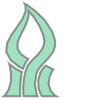

In [1]:
import shapely.geometry
import shapely.wkt

f = open("data/bgu.wkt", "r", encoding = "utf-8")
text = f.readline()
f.close()
logo = shapely.wkt.loads(text)
logo

> * Calculate the area of the logo.

In [2]:
logo.area

0.21286694897980007

> * Calculate a circle that is enclosing the logo. To do that, first calculate the average of x-axis bounds and the average of the y-axis bounds, then construct a point according to those x and y values, and finally buffer the point to a distance of your choice so that the logo is completely within the buffer.
> * Calculate the geometry of the *difference* between the logo and the bouding circle you calculated, then *plot* it.

In [3]:
bb = logo.bounds
x = (bb[0] + bb[2]) / 2
y = (bb[1] + bb[3]) / 2
pnt = shapely.wkt.loads("POINT (" + str(x) + " " + str(y) + ")")
circ = pnt.buffer(0.7)
circ.difference(logo)